# <h1><center> Przetwarzanie i analiza danych w języku Python - Projekt II/III </center></h1>

# <h1><center>Raport z własnych zbiorów benchmarkowych</center></h1>


## Wstęp

Celem raportu jest sprawdzenie i porównanie jakości działania różnych metod klasteryzacji na trzech autorskich zbiorach (dwa z nich wymiaru $R^2$ i jeden $R^3$.
Zbiory zostały wytworzone w programie python i zapisane w postaci plików *.data* oraz *.labels0*. Następnie za pomocą funkcji zdefiniowanych w pliku *Padpy_generowanie_csv.py* wyniki benchmarków zostały zapisane w pliku *.csv*, z którego będziemy korzystać tworząc ten raport.
Za pomocą wyżej wspomnianych funkcji wygenerowane zostały również wykresy jako pliki *.png*, które będą zawarte w poniższym raporcie.

## Wykorzystane metody

Do porównania jakości klasteryzacji wykorzystane zostały następujące metody:
* zaimplementowany zgodnie z instrukcją **algorytm spektralny** (nazwa funkcji: *spectral_clustering*)
* metoda **k_średnich** - z wykorzystaniem pakietu *sklearn* i funkcji *KMeans()*
* algorytmy **hierarchiczne** - z wykorzystaniem funkcji *AgglomerativeClustering* z następującymi parametrami:
    - *single linkage* - miarą odległości między klastrami jest odlegość między najbliższymi punktami z dwóch różnych klastrów
    - *ward linkage* - bazuje na sumie kwadratów odległości euklidesowych między punktami z różnych klastrów
    - *complete linkage* - miarą odległości między klastrami jest odlegość między najdalszymi punktami z dwóch różnych klastrów
    - *average linkage* - średnia odległości każdych obserwacji z dwóch potencjalnych klastrów

* algorytm **DBSCAN** (*Density-Based Spatial Clustering of Applications with Noise*) - klasteryzacja dla najbardziej
zagęszczonych punktów
* algorytm **Genie** - algorytm hierarchiczny bazujący na współczynniku Giniego

Porównanie zostanie również działanie zaimplementowanego algorytmu spektralnego dla różnych parametrów M, równych: 1%, 5%, 10% lub 30% wszystkich obserwacji w danym zbiorze. W przypadku, gdy dla żadnej z tych wartości parametru metoda nie działała dobrze, została również sprawdzona metoda z ręcznie wprowadzoną wartością M, niezależnie od wielkości zbioru.

Jakość wyników poszczególnych algorytmów zostanie porównana za pomocą:
* indeksu **Fowlkesa–Mallowsa** (FMI) - zwraca podobieństwo między zwracanymi klastrami, obliczany za pomocą wzoru:
$$\sqrt{\frac{TP}{TP+FP} \cdot \frac{TP}{TP+FN}}$$

* skorygowanego indeksu **Randa** (ARI) - jest to indeks Randa skorygowany o prawdopodobieństwo przydziału punktów do danego klastra, gdzie indeks Randa jest wyrożony nastepującą furmułą:
$$\sqrt{\frac{TP+TN}{TP+FP+FN+TN}}$$

gdzie: 
- TP - *true positive*
- TN - *true negative*
- FP - *false positive*
- FN - *false negative*

## Pakiety i funkcje 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import plotly.graph_objects as go

#### Funkcja rysująca wykres słupkowy dla wartości ARI i FMI dla poszczególnych metod:

In [2]:
def wykres1(index_ARI, index_FMI, names, plot_title):
    """
    Funkcja przyjmuje argumenty:
    index_ARI - type: list of floats, lista wspolczynnikow ARI
    index_FMI - type: list of floats, lista wspolczynnikow FMI
    names - type: list of strings, lista z nazwami metod uzytych do porownania
    plot_title - type: string, tytul wykresu
    
    funkcja rysuje wykres slupkowy interaktywny za pomoca pakietu Plotly
    """
    fig = go.Figure(data=[
        go.Bar(name='Fowlkes-Mallows index', x=names, y=np.round(index_FMI,4)),
        go.Bar(name='Adjusted Rand index', x=names, y=np.round(index_ARI,4))],
        )
    
    hovertemplate = "<b>%{x}</b><br>" +\
                    "Index value: %{y}<br>"
    
    fig.update_traces(
        hovertemplate=hovertemplate
    )
    fig.update_layout(barmode="group", 
                      title= {
                        'text' : '<b>'+ plot_title +'</b>',
                        'x':0.5,
                        'xanchor': 'center'})

    
    fig.show()

    return

In [3]:
plots_title = "Wykres wartości indeksów FMI i ARI dla poszczególnych algorytmów klasteryzacji"

#### Funkcja generująca tabelę w wartościami indeksów poszczególnych metod:

In [4]:
def tabelka(names, index_ARI, index_FMI, w=1050, h=350):
    """
    Funkcja przyjmuje argumenty:
    index_ARI - type: list of floats, lista wspolczynnikow ARI
    index_FMI - type: list of floats, lista wspolczynnikow FMI
    names - type: list of strings, lista z nazwami metod uzytych do porownania
    """
    fig = go.Figure(data=[go.Table(header=dict(values=['Method', 'Fowlkes-Mallows index',
                                                       'Adjusted Rand index']),
                     cells=dict(values=[names, np.round(index_FMI,4), np.round(index_ARI,4)]))
                         ])
    fig.update_layout(width=w, height=h)
    fig.show()
    return

In [5]:
def tabelka_std(names, index_ARI, index_FMI,index_ARI_std,index_FMI_std, w=1000, h=350):
    """
    Funkcja przyjmuje argumenty:
    index_ARI - type: list of floats, lista wspolczynnikow ARI
    index_FMI - type: list of floats, lista wspolczynnikow FMI
    names - type: list of strings, lista z nazwami metod uzytych do porownania
    index_ARI_std - type: list of floats, lista wspolczynnikow ARI dla zmiennych zestandaryzowanych
    index_FMI_std - type: list of floats, lista wspolczynnikow FMI dla zmiennych zestandaryzowanych
    """
    fig = go.Figure(data=[go.Table(header=dict(values=['Method', 'FMI', 'ARI',
                                                       'FMI for standarized values', 'ARI for standarized values']),
                     cells=dict(values=[names, np.round(index_FMI,4), np.round(index_ARI,4), 
                               np.round(index_FMI_std,4), np.round(index_ARI_std,4)]))
                         ])
    fig.update_layout(width=w, height=h)
    fig.show()
    return

Zdefiniujmy ścieżkę do wczytywanych plików oraz funkcję która będzie wczytywała pliki *.csv* i podawała informacje o wymiarach zbioru i liczbie klastrów.

In [6]:
path1 = r"C:\Users\patry\OneDrive\Pulpit\Zdalne pw\Python - PadPy\Projekt_23_dane_benchmarkowe"

def wczytaj(path, file_name):
    zbior = pd.read_csv(path + '\\' + file_name, sep=';')
    print("Wymiary zbioru: ", zbior["Shape"][0])
    print("Liczba klastrów", zbior["Number of clusters"][0])
    return zbior

## Zbiór 1

In [7]:
zbior1 = wczytaj(path1, 'zbior1_4.csv')

Wymiary zbioru:  (1400, 2)
Liczba klastrów 4


Widzimy, że *zbior1* jest dwuwymiarowy i ma 4 odgórnie zdefiniowane klastry. Zbiór został stworzony za pomocą pakietu *numpy* oraz zdefiniowanych funkcji **X(t)** oraz **Y(t)**, których wartości obrazują okręgi oraz kształt 'odwróconego serca'. Wykres, wraz z podziałem punktów na klastry zawarte w pliku *.labels0*,  wygląda następująco:  

In [8]:
Image(path1 + '\\' + "zbior1_4_main.png", width=500, height=500)

In [9]:
wykres1(list(zbior1['Adjusted Rand index']), list(zbior1['Fowlkes-Mallows index']), list(zbior1['Method']), plots_title)

Na podstawie wykresu możemy zauważyć, że metody:
* hierarchiczna z parametrem *single linkage*
* Genie
* spektralna z M=1% wszystkich obserwacji (dla naszego zbioru M=14)

są równoważne z podziałem zawartym w pliku *.labels0*.
Pozostałe metody działają już zdecydowanie gorzej. Zobaczmy to na wykresach:

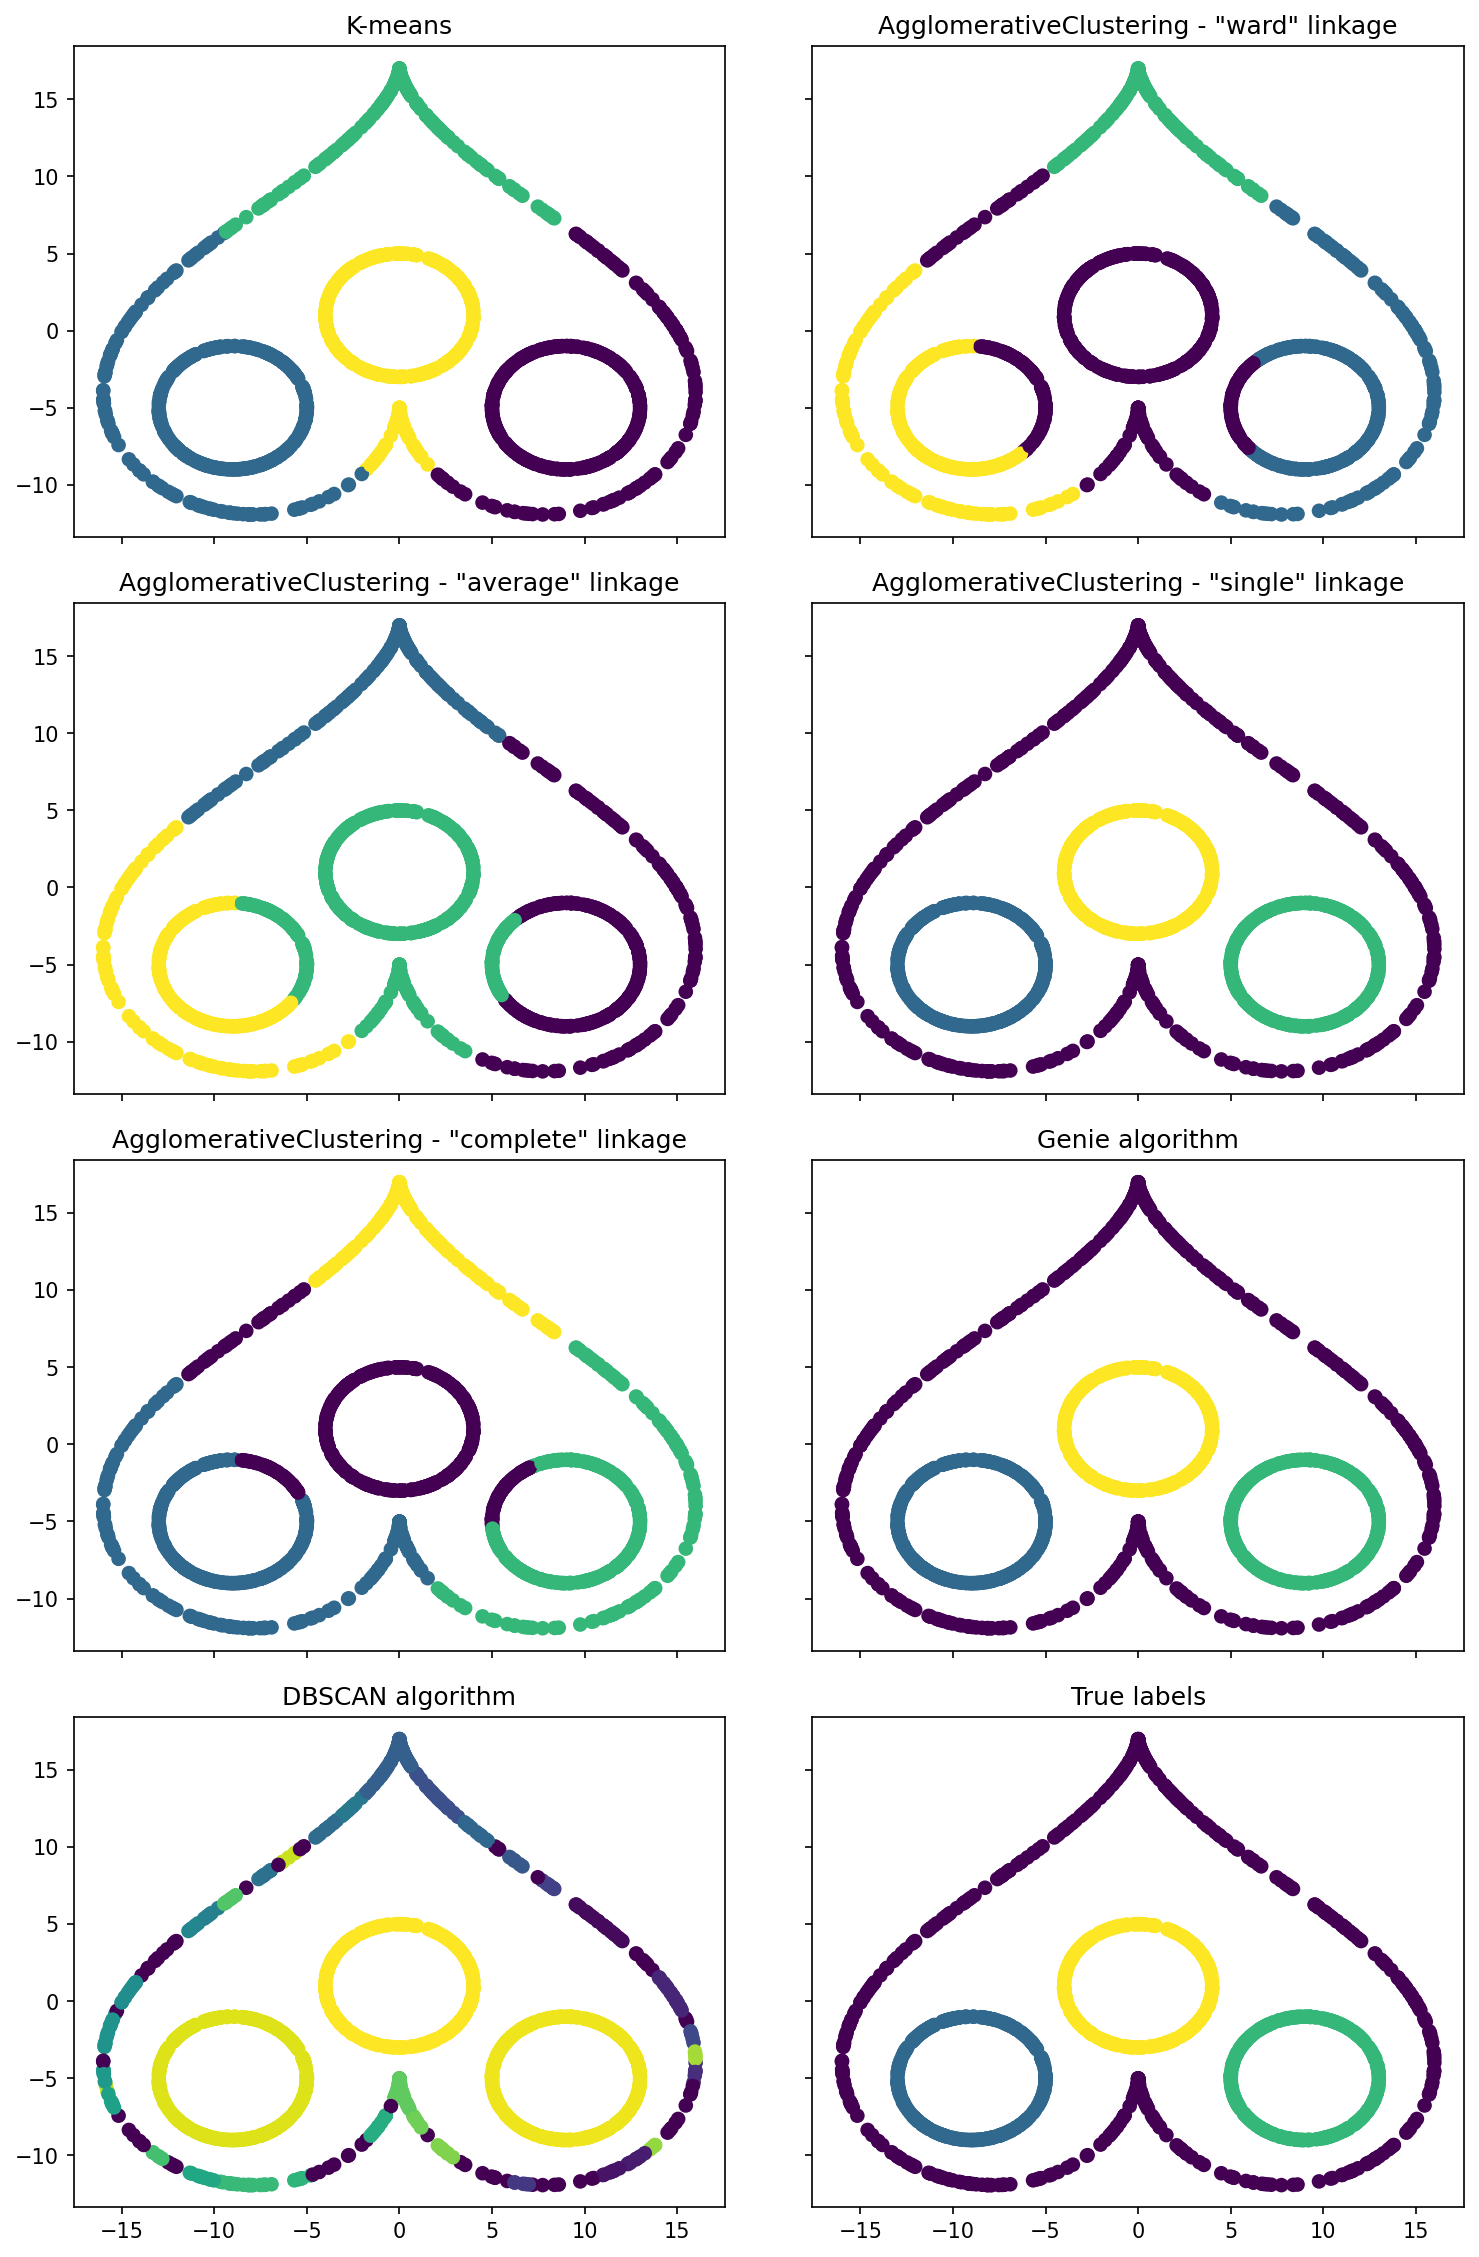

In [10]:
Image(path1 + '\\' + "zbior1_4_builtin_methods.png", width=1000, height=500)

In [11]:
Image(path1 + '\\' + "zbior1_4_spectral_algorithm.png", width=1000, height=500)

Istotnie na wykresach widać, że wspomniane metody z dwoma współczynnikami o wartościach równych 1 dzielą zbiory zdecydowanie najlepiej.


## Zbiór 2

In [12]:
zbior2 = wczytaj(path1, 'zbior2_2.csv')

Wymiary zbioru:  (750, 2)
Liczba klastrów 2


In [13]:
Image(path1 + '\\' + "zbior2_2_main.png", width=500, height=500)

*zbior2* jest dwuwymiarowy i ma 2 odgórnie zdefiniowane klastry. Powstał za pomocą wygenerowania 450 punktów z rozkładu jednostajnego ciągłego na przedziale [-6,0] oraz 300 punktów na przedziale [-3,3].
Następnie na wygenerowanych punktach zdefiniowano funkcje, odpowiednio: 
* moduł punktów skorygowany o błąd wylosowany z rozkładu normalnego o średniej równej 0 oraz odchyleniu standardowym 0.1
* liczba przeciwna do modułu punktów zwiększonych o 3, skorygowany o błąd wylosowany z rozkładu normalnego o średniej równej 0 oraz odchyleniu standardowym 0.25

In [14]:
wykres1(list(zbior2['Adjusted Rand index']), list(zbior2['Fowlkes-Mallows index']), list(zbior2['Method']), plots_title)

Na podstawie wartości indeksów, szczególnie indeksu *ARI* widzimy, że zbiór został dobrze podzielony jedynie po użyciu metod:
Genie, hierarchicznej z użyciem parametru *single linkage* oraz algorytmu spektralnego z parametrami M równymi 5% i 10% liczby obserwacji w zbiorze (czyli odpowiedno M=37 i M=75). Zobaczmy to na wykresach obrazujących podział punktów na klastry przez poszczególne metody: 

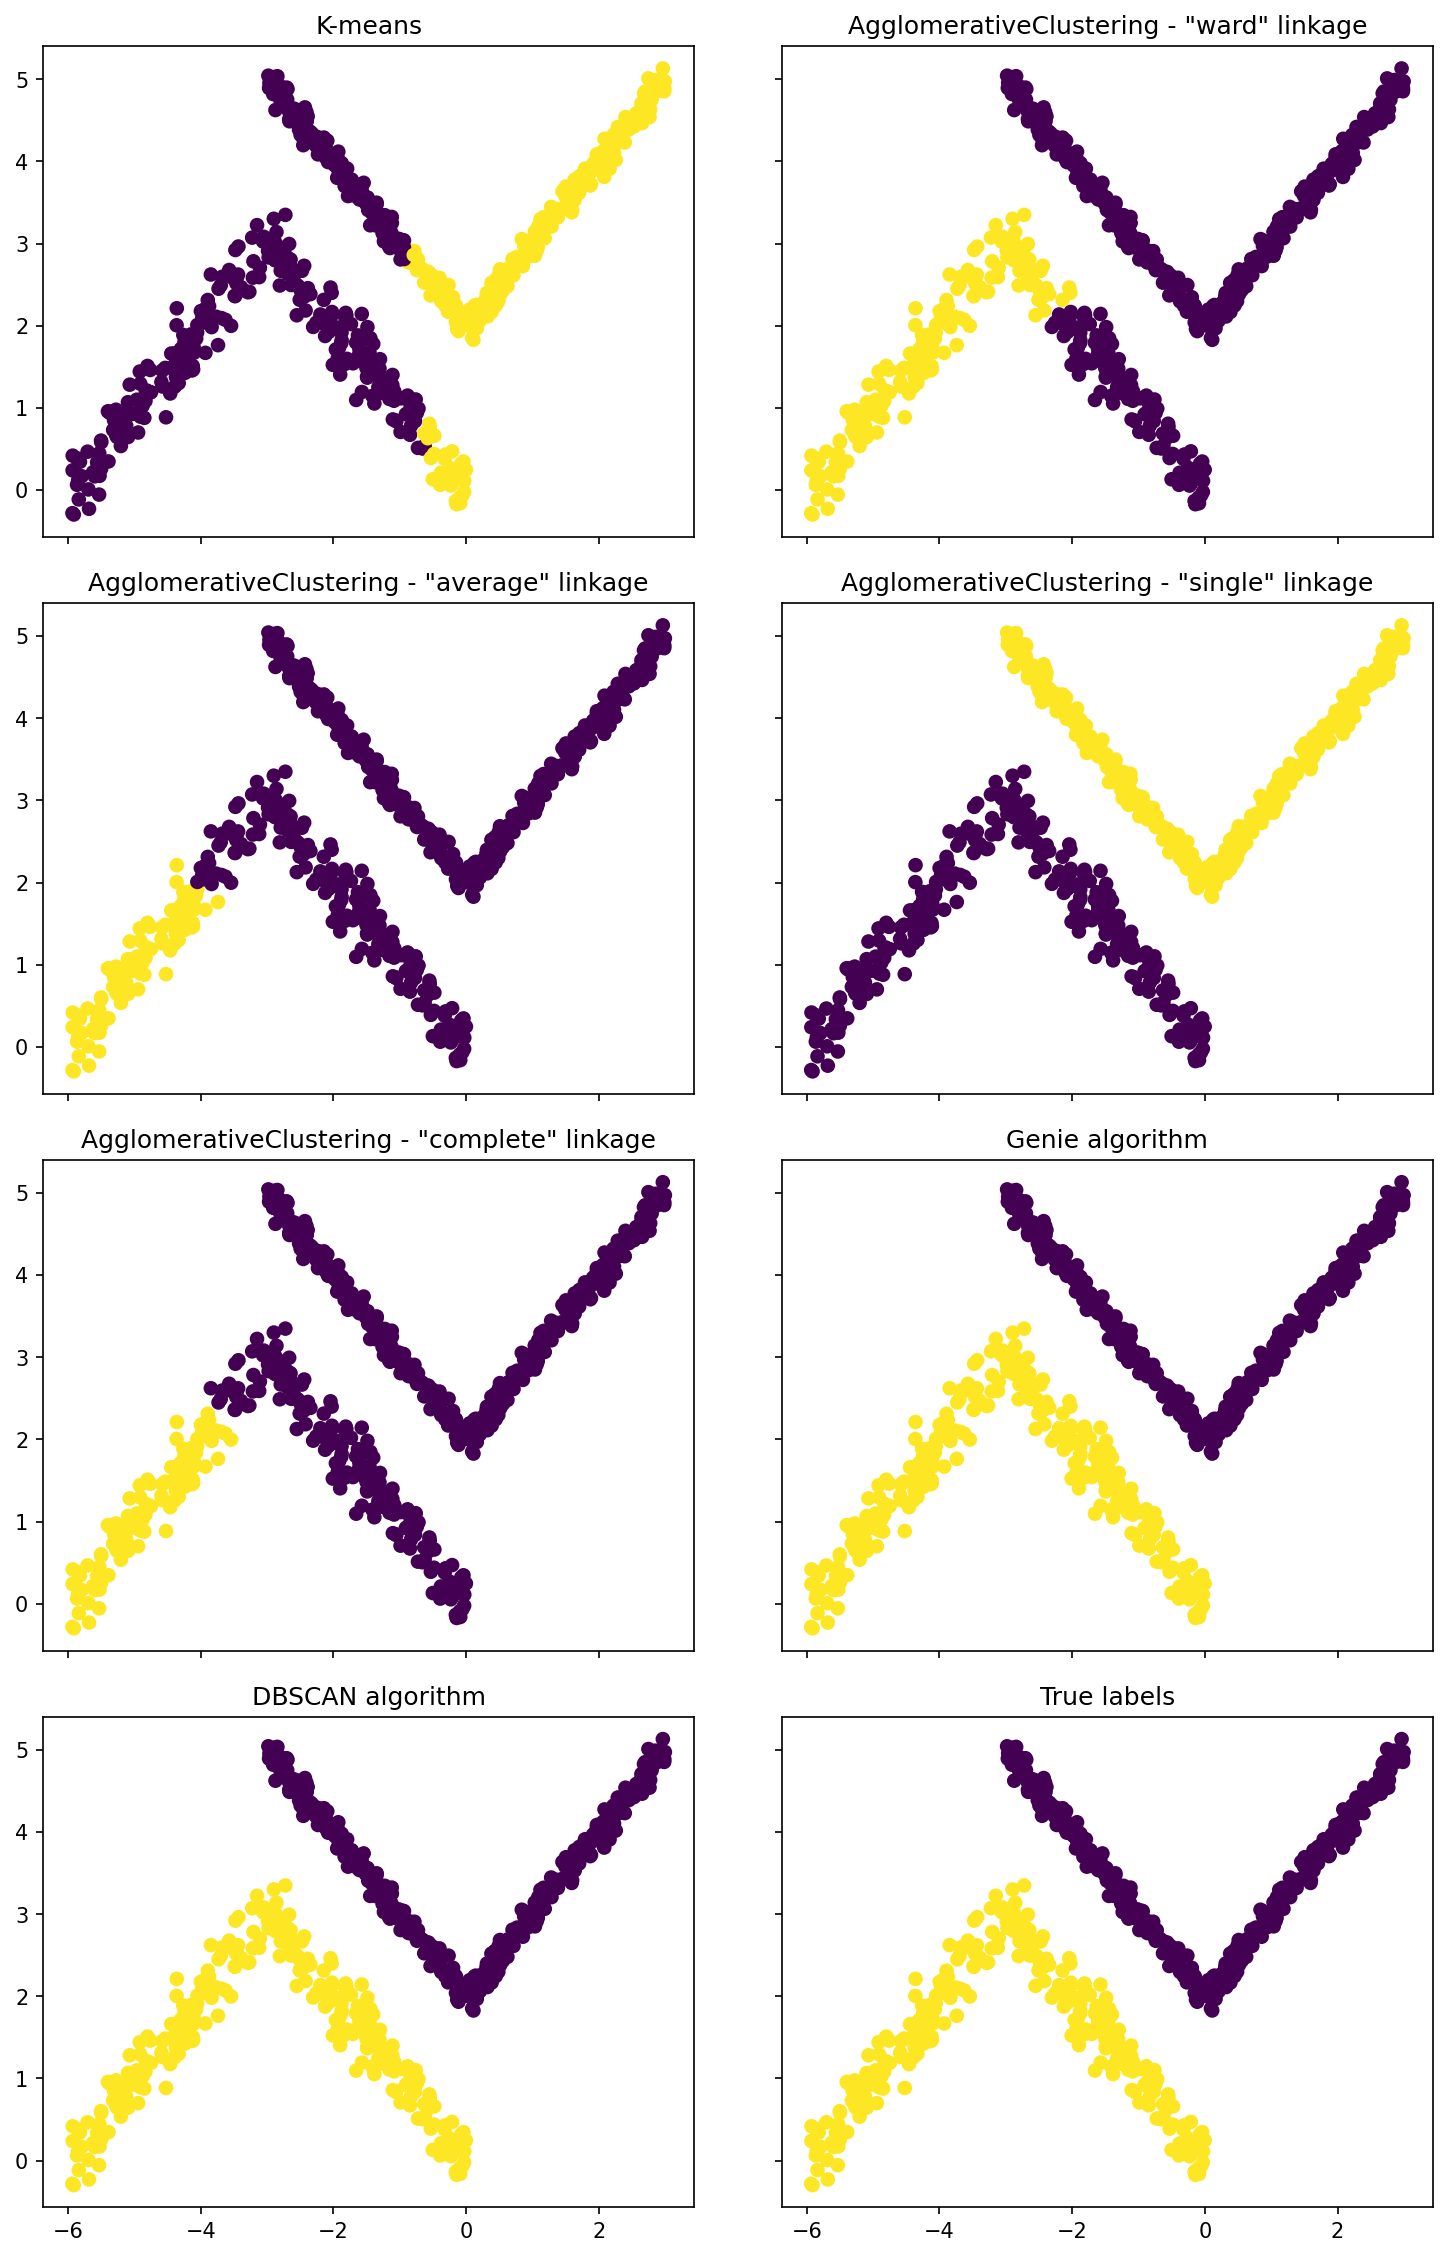

In [15]:
Image(path1 + '\\' + "zbior2_2_builtin_methods.png", width=1000, height=500)

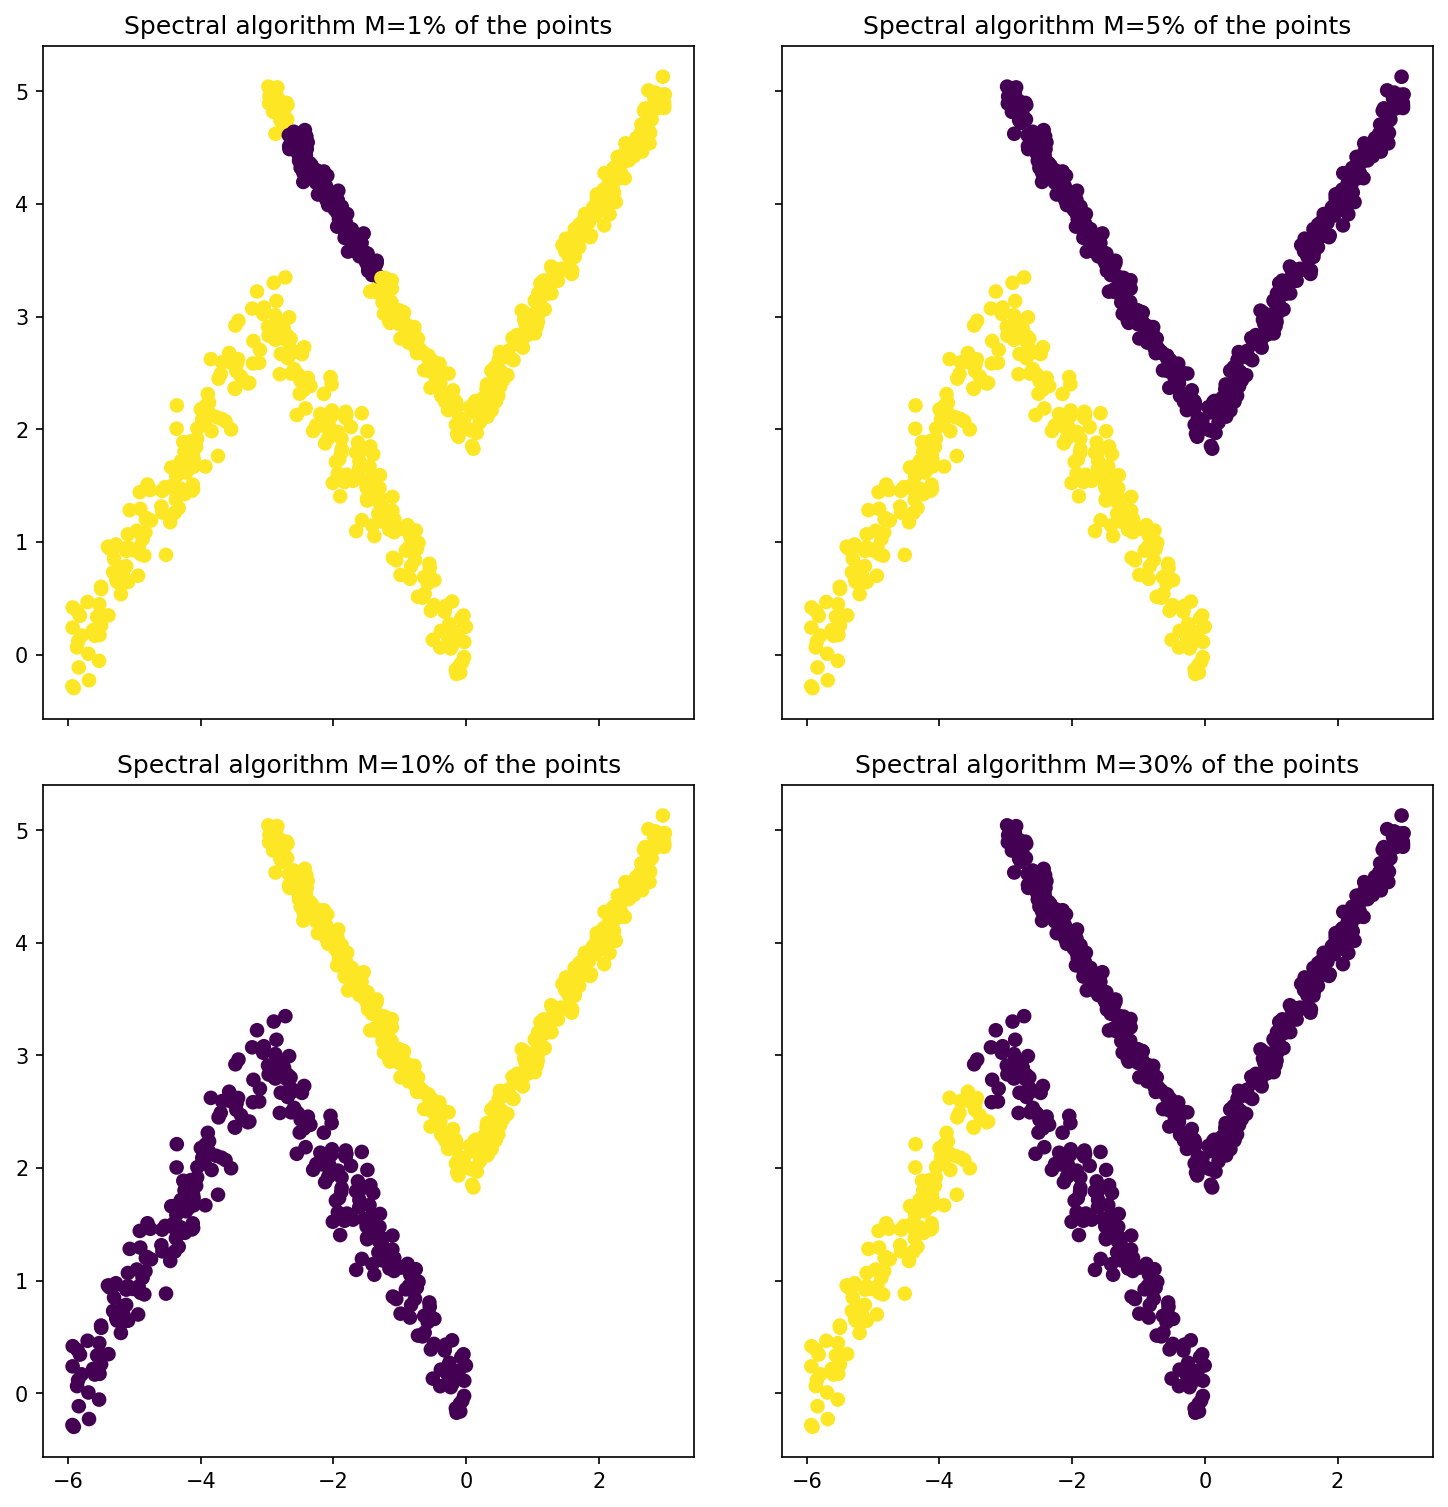

In [16]:
Image(path1 + '\\' + "zbior2_2_spectral_algorithm.png", width=1000, height=500)

W tym przypadku również widać zdecydowanie lepsze działanie metod ze współczynnikami *FMI* oraz *ARI* równymi 1 od pozostałych.

## Zbiór 3

In [17]:
zbior3 = wczytaj(path1, 'zbior3_3.csv')

Wymiary zbioru:  (1750, 3)
Liczba klastrów 3


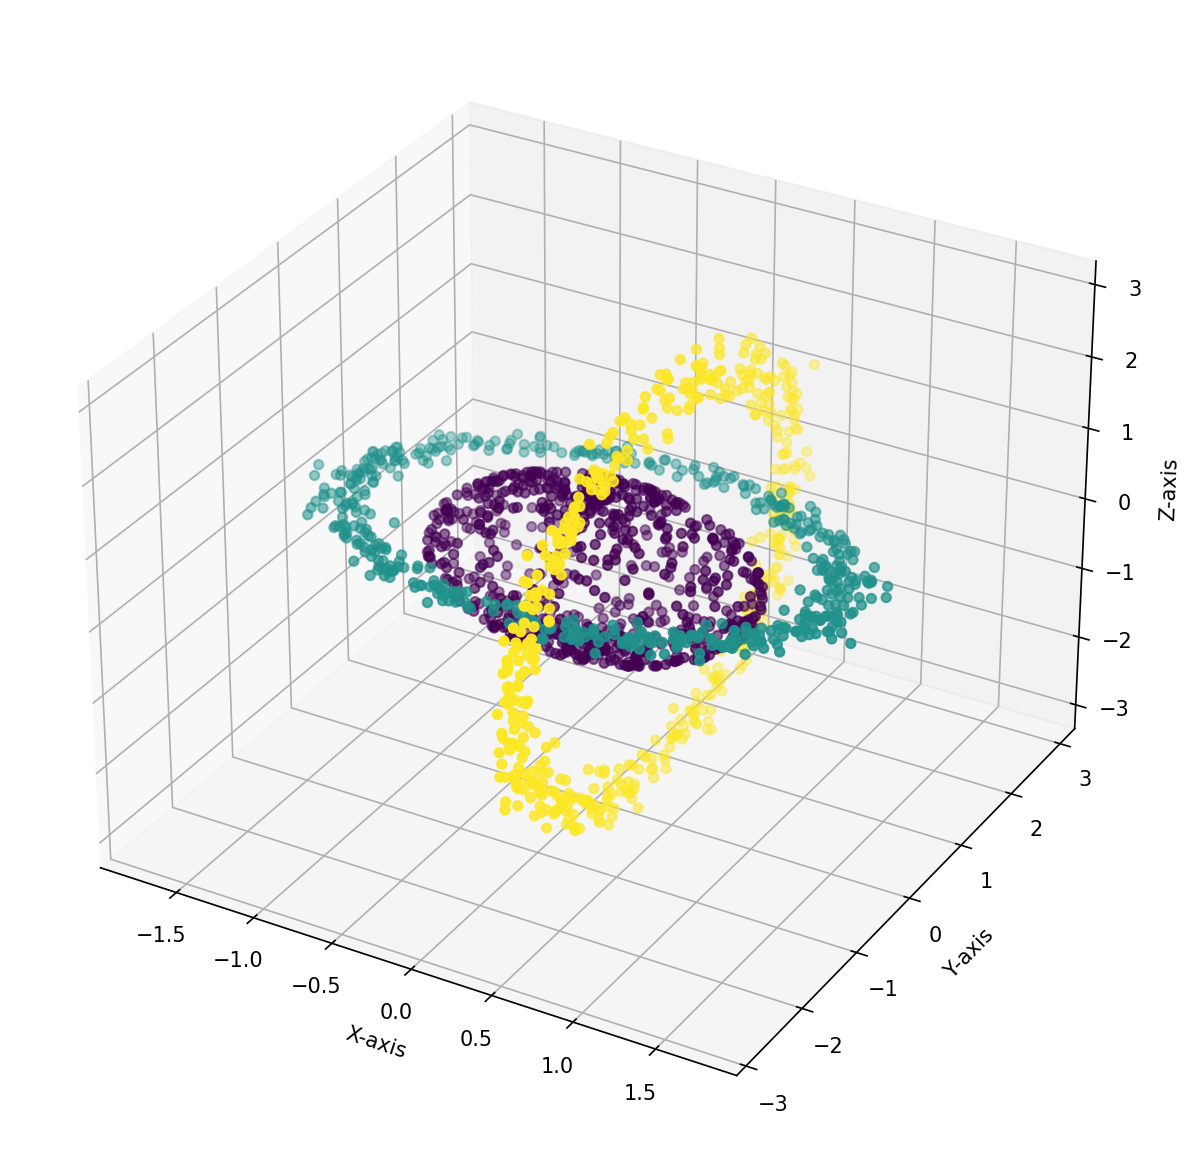

In [18]:
Image(path1 + '\\' + "zbior3_3_main.png", width=500, height=500)

*zbior3* ma 3 wymiary i 3 odgórnie zdefiniowane klastry. Powstał za pomocą wygenerowania:
* 750 punktów poprzez zastosowanie parametryzacji sferycznej tworząc kształ kuli
* po 500 punktów poprzez zastosowanie współrzędnych biegunowych (na punktach z rozkładu jednostajnego) skorygowanych o błędy z rozkładu normalnego o średnich równych 0 i odchyleniach standardowych równych odpowiednio 0.1 i 0.2, tworząc dwa okręgi w przestrzeni $R^3$

In [19]:
wykres1(list(zbior3['Adjusted Rand index']), list(zbior3['Fowlkes-Mallows index']), list(zbior3['Method']), plots_title)

Dla tego zbioru jedynie algorytmy: *Genie* oraz *spektralny* dla M=1% obserwacji działają poprawnie. Dla pozostałych metod oba współczynniki są zdecydowanie niższe. Różnica w jakości działania algorytmów jest zauważalna na poniższych wykresach: 

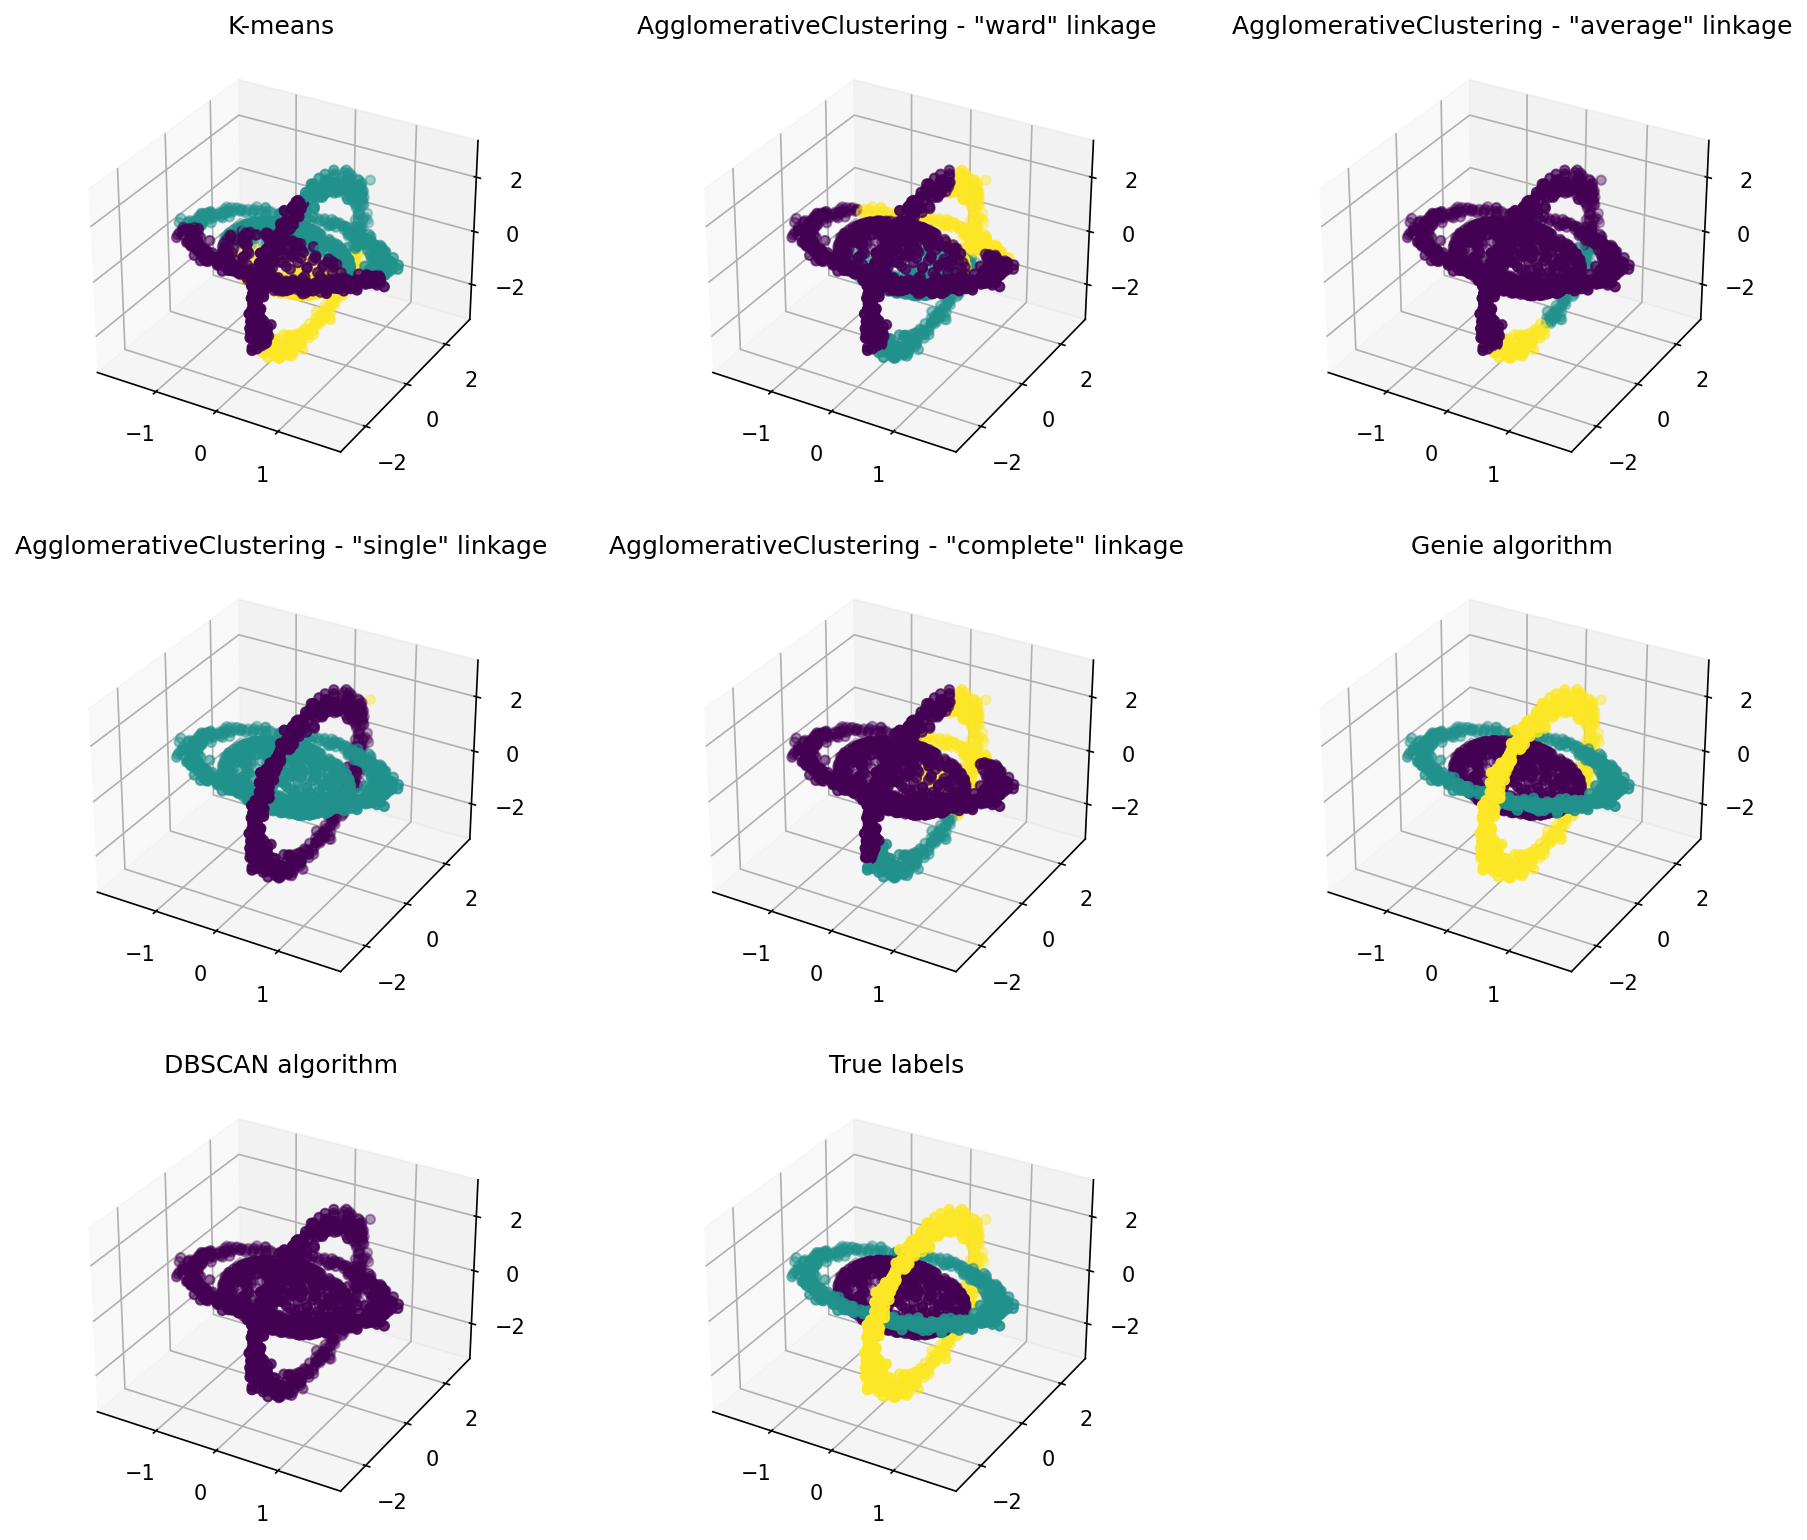

In [20]:
Image(path1 + '\\' + "zbior3_3_bulitin_methods.png", width=1000, height=500)

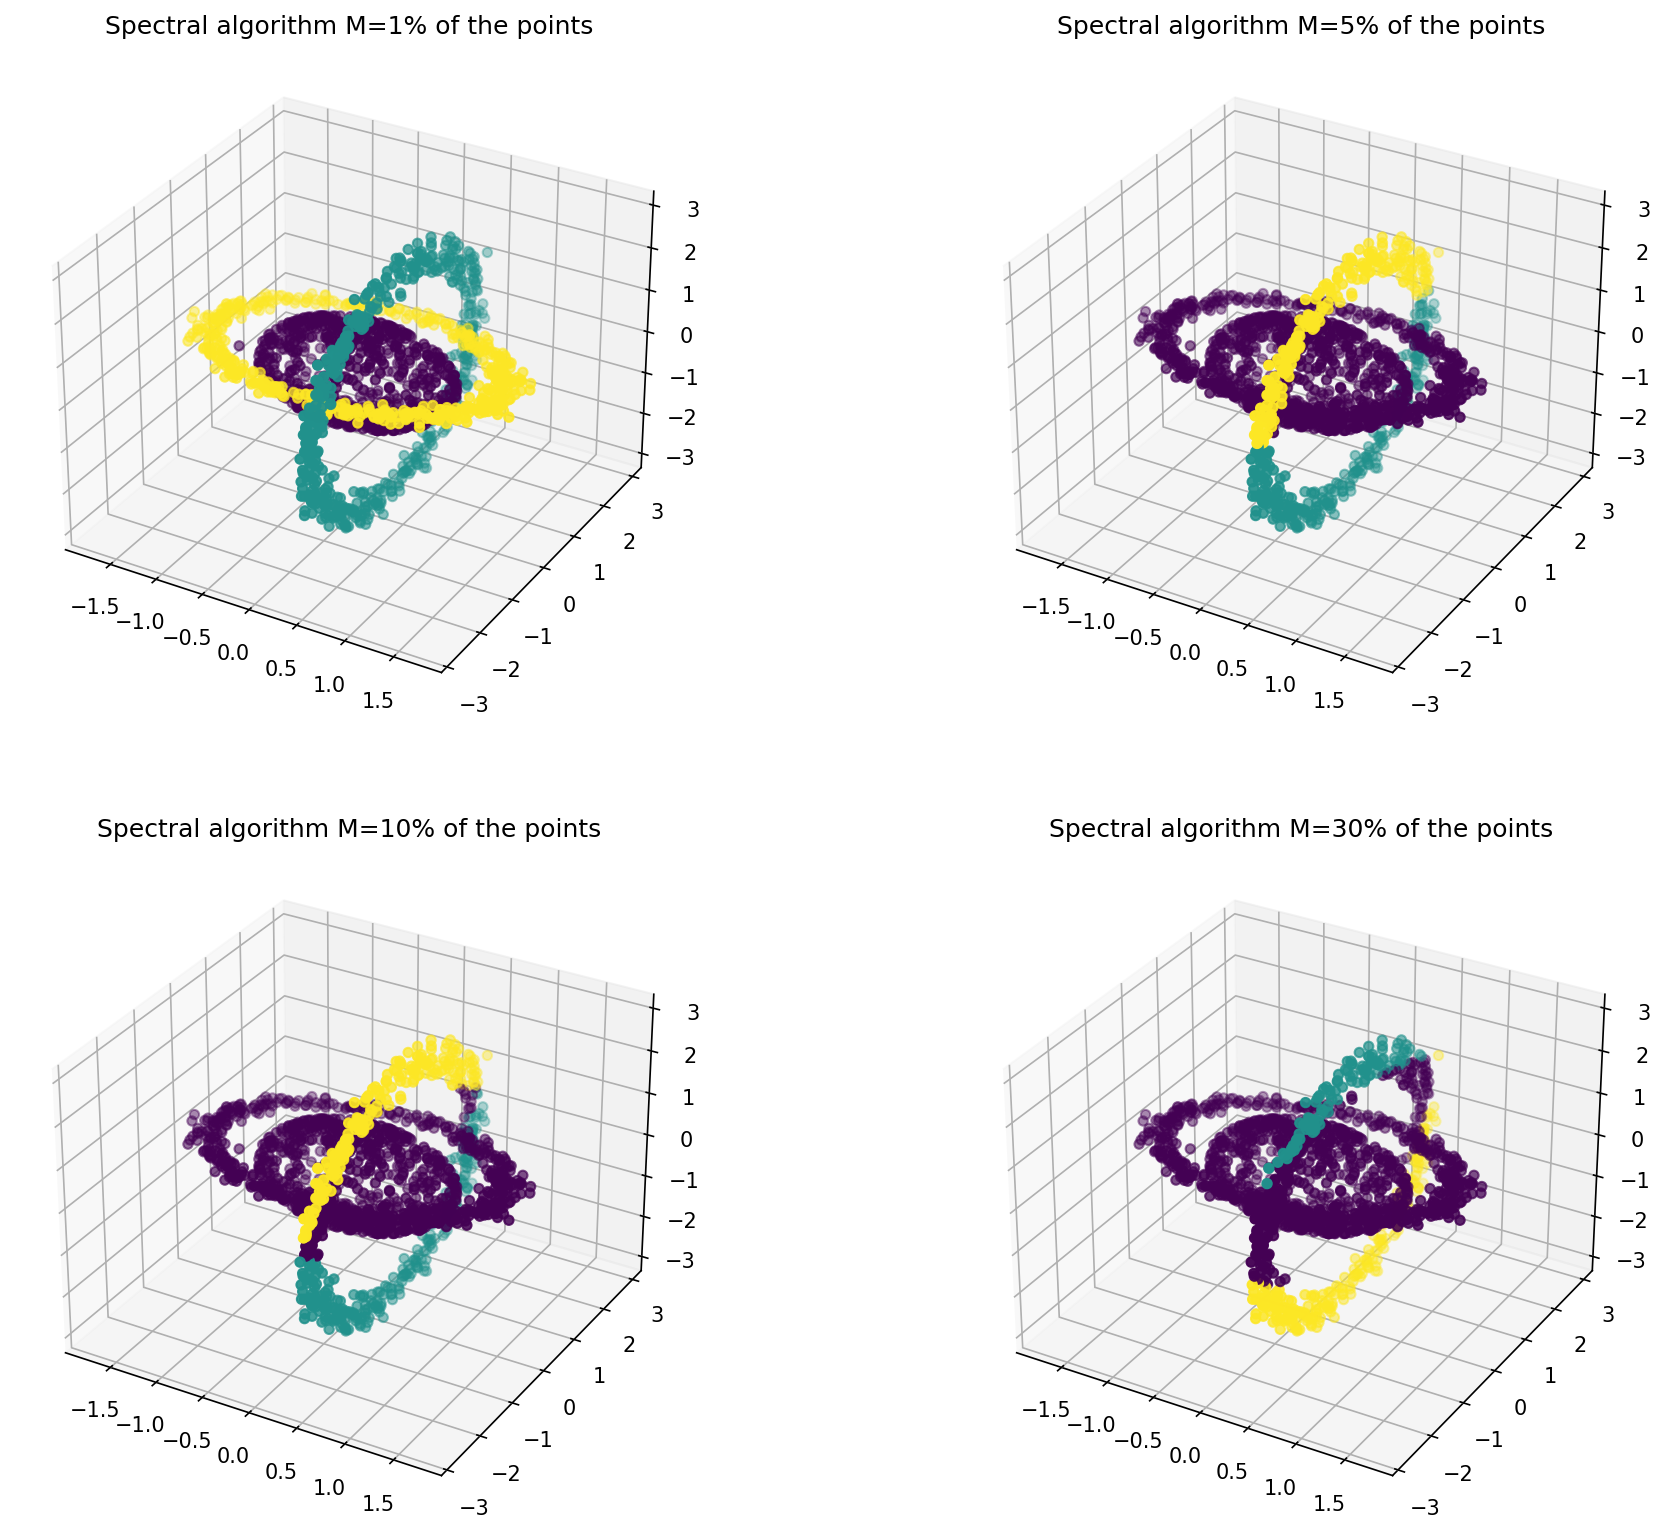

In [21]:
Image(path1 + '\\' + "zbior3_3_spectral_algorithm.png", width=1000, height=500)

## Wpływ standaryzacji zmiennych

Zbadamy teraz wpływ standaryzacji zmiennych na jakość klasteryzacji różnych metod. Użyto do tego funkcji *StandardScaler* z pakietu *sklearn*.

### Zbiór 1 

In [22]:
zbior1_std = wczytaj(path1, 'zbior1_std_4.csv')

Wymiary zbioru:  (1400, 2)
Liczba klastrów 4


Poniżej zostały przedstawione wykresy obrazujące wartości indeksów przed i po standaryzacji zmiennych.

In [23]:
wykres1(list(zbior1['Adjusted Rand index']), list(zbior1['Fowlkes-Mallows index']), list(zbior1['Method']), plots_title)
wykres1(list(zbior1_std['Adjusted Rand index']), list(zbior1_std['Fowlkes-Mallows index']), list(zbior1_std['Method']),
       plots_title + "<br> po standaryzacji zmiennych </br>")

Dla zbioru pierwszego widzimy małą różnicę w wartościach współczynników przed i po standaryzacji zmiennych. Zauważalny jest jedynie znaczny spadek wartości indeksu *ARI* dla metody *DBSCAN*. 

### Zbiór 2

In [24]:
zbior2_std = wczytaj(path1, 'zbior2_std_2.csv')

Wymiary zbioru:  (750, 2)
Liczba klastrów 2


Poniżej zostały przedstawione tabele obrazujące wartości indeksów przed i po standaryzacji zmiennych.

In [25]:
tabelka_std(list(zbior2['Method']), list(zbior2['Adjusted Rand index']), list(zbior2['Fowlkes-Mallows index']),
            list(zbior2_std['Adjusted Rand index']),list(zbior2_std['Fowlkes-Mallows index']), w=1000, h=650)

Obserwując wartości w tabelach ponownie widzimy znaczne pogorszenie jakości metody *DBSCAN*. Za to po standaryzacji zmiennych, bardzo wysokie wartości obu współczynników zanotowała metoda k-średnich.

### Zbiór 3

In [26]:
zbior3_std = wczytaj(path1, 'zbior3_std_3.csv')

Wymiary zbioru:  (1750, 3)
Liczba klastrów 3


In [27]:
wykres1(list(zbior3['Adjusted Rand index']), list(zbior3['Fowlkes-Mallows index']), list(zbior3['Method']), plots_title)
wykres1(list(zbior3_std['Adjusted Rand index']), list(zbior3_std['Fowlkes-Mallows index']), list(zbior3_std['Method']),
       plots_title + "<br> po standaryzacji zmiennych </br>")

Dla trzeciego zbioru po standaryzacji zmiennych różnicę widzimy jedynie w przypadku metody spektralnej - dla M=1% obserwacji wartości współczynników uległy pogorszeniu.

## Wnioski

Na podstawie powyżej omówionych zbiorów możemy wysunąć następujące wnioski:
* dla zmiennych niezestandaryzowanych zdecydowanie najlepiej działają algorytmy *Genie* oraz algorytm spektralny, ewentualnie algorytm hierarchiczny z parametrem *single linkage*
* parametr M ustawiony jako procent liczby obserwacji w zbiorze nie gwarantuje dobrej klasteryzacji przez algorytm spektralny (z reguły działa on najlepiej dla małych M - procentowo zależy to od wielkości zbioru - mniejszy procent dla dużych zbiorów)
* po standaryzacji zmiennych pogorszeniu ulega działanie metody *DBSCAN*, natomiast poprawia się działanie metody *k-średnich* (szczególnie w przypadkach, gdy moduły wartości obserwacji istotnie różnią się dla danych zmiennych - tak było dla zbioru drugiego) 